In [1]:
1132226447%70+1

38

# Теоретическое введение

## Модель эпидемии SIR

Рассмотрим простейшую модель эпидемии. Предположим, что некая популяция, состоящая из $N$ особей, (считаем, что популяция изолирована) подразделяется на три группы. Первая группа - это восприимчивые к болезни, но пока здоровые особи, обозначим их через   $S(t)$. Вторая группа – это число инфицированных особей, которые также при этом являются распространителями инфекции, обозначим их $I(t)$. А третья группа, обозначающаяся через $R(t)$ – это здоровые особи с иммунитетом к болезни.  

До того, как число заболевших не превышает критического значения 
$I^*$, считаем, что все больные изолированы и не заражают здоровых. Когда $I(t)>I^*$, 
тогда инфицирование способны заражать восприимчивых к болезни особей.  
Таким образом, скорость изменения числа $S(t)$ меняется по следующему 
закону:

$$
\frac{dS}{dt} = 
\begin{cases}
-\alpha S, & \text{если } I(t) > I^* \\
0, & \text{если } I(t) \leq I^*
\end{cases}
\tag{1}
$$
   
Поскольку каждая восприимчивая к болезни особь, которая, в конце концов, заболевает, сама становится инфекционной, то скорость изменения числа инфекционных особей представляет разность за единицу времени между заразившимися и теми, кто уже болеет и лечится, т.е.: 

$$
\frac{dI}{dt} = 
\begin{cases}
\alpha S - \beta I, & \text{если } I(t) > I^* \\
-\beta I, & \text{если } I(t) \leq I^*
\end{cases}
\tag{2}
$$


А скорость изменения выздоравливающих особей (при этом приобретающие 
иммунитет к болезни) 

$$
\frac{dR}{dt} = \beta I
\tag{3}
$$

Постоянные пропорциональности \(\alpha\) и \(\beta\) — это коэффициенты заболеваемости и выздоровления соответственно.

Для того, чтобы решения соответствующих уравнений определялось *
однозначно, необходимо задать начальные условия. Считаем, что на начало 
эпидемии в момент времени $t=0$  нет особей с иммунитетом к болезни $R(0)=0$, а 
число инфицированных и восприимчивых к болезни особей  $I(0)$ и $S(0)$ соответственно. Для анализа картины протекания эпидемии необходимо рассмотреть два случая: $I(0)\leq I^*$ и $I(0)>I^*$

## Вариант 38

На одном острове вспыхнула эпидемия. Известно, что из всех проживающих на острове ($N=12700$) в момент начала эпидемии ($t=0$) число заболевших людей
(являющихся распространителями инфекции) $I(0)=170$, А число здоровых людей с иммунитетом к болезни $R(0)=57$. Таким образом, число людей восприимчивых к
болезни, но пока здоровых, в начальный момент времени $S(0)=N-I(0)-R(0)$.

Постройте графики изменения числа особей в каждой из трех групп.

Рассмотрите, как будет протекать эпидемия в случае:

1) если $I(0)\leq I^*$;

2) если $I(0) > I^*$.

In [2]:
using DifferentialEquations, Plots

In [22]:
N = 12700
I_0 = 170
R_0 = 57
S_0 = N - I_0 - R_0
u0 = [S_0, I_0, R_0]
p = [0.5, 0.1]
tspan = (0.0, 50.0)

(0.0, 50.0)

## Случай $I(0)\leq I^*$

Рассмотрим случай, когда число заболевших не превышает критического значения $I^*$, то есть считаем, что все больные изолированы и не заражают здоровых.


In [4]:
function sir_2(u,p,t)
    (S,I,R) = u
    (b, c) = p
    dS = 0
    dI = -c*I
    dR = c*I
    return [dS, dI, dR]
end

sir_2 (generic function with 1 method)

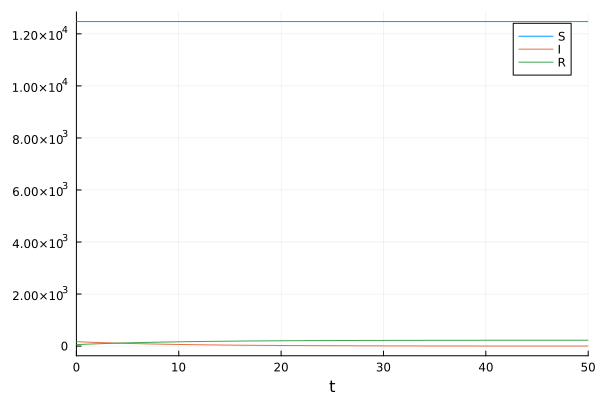

In [24]:
prob_2 = ODEProblem(sir_2, u0, tspan, p)
sol_2 = solve(prob_2, Tsit5(), saveat = 0.1)
plot(sol_2, label = ["S" "I" "R"])

## Случай $I(0) > I^*$

Рассмотрим случай, когда число заболевших превышает критическое значения $I^*$, то есть считаем, что инфицирование способны заражать восприимчивых к болезни особей. 


In [12]:
function sir(u,p,t)
    (S,I,R) = u
    (b, c) = p
    dS = -(b*S)
    dI = (b*S) - c*I
    dR = c*I
    return [dS, dI, dR]
end

sir (generic function with 1 method)

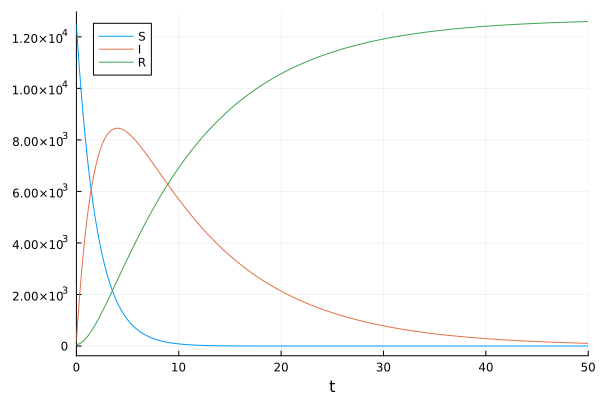

In [23]:
prob = ODEProblem(sir, u0, tspan, p)
sol = solve(prob, Tsit5(), saveat = 0.1)
plot(sol, label = ["S" "I" "R"])

OpenModelica1

```Modelica
model lab6_1
  parameter Real I_0 = 170;
  parameter Real R_0 = 57;
  parameter Real N = 12700;
  parameter Real S_0 = N-I_0-R_0;
  parameter Real b = 0.5;
  parameter Real c = 0.1;
  
  Real S(start=S_0);
  Real I(start=I_0);
  Real R(start=R_0);
  
equation
  der(S) = 0;
  der(I) = - c*I;
  der(R) = c*I;

end lab6_1;
```

OpenModelica2

```Modelica
model lab6_2
  parameter Real I_0 = 170;
  parameter Real R_0 = 57;
  parameter Real N = 12700;
  parameter Real S_0 = N-I_0-R_0;
  parameter Real b = 0.5;
  parameter Real c = 0.1;
  
  Real S(start=S_0);
  Real I(start=I_0);
  Real R(start=R_0);
  
equation
  der(S) = -b*S;
  der(I) = b*S - c*I;
  der(R) = c*I;
end lab6_2;
```